In [1]:
# Import some basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the training data

data = pd.read_csv('./train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


# Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
print(data['Transported'].value_counts())

Transported
True     4378
False    4315
Name: count, dtype: int64


## Missing values
There are around 200 missing values in all the columns except the result and the unique Id. This is a problem because many of the features that seem to be important have large number of missing valued.

In [8]:
data.duplicated().sum()

0

## Duplicates

The data elements are free of any duplicate rows

In [9]:
columns = data.columns
for column in columns:
  print(column, data[column].nunique())

PassengerId 8693
HomePlanet 3
CryoSleep 2
Cabin 6560
Destination 3
Age 80
VIP 2
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306
Name 8473
Transported 2


In [10]:
for column in columns:
  print(column, data[column].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

# Some general facts
The Pasenger Id, the names and the passenger IDS serve no purpose in determining if a passenger was teleported. I also have my doubts regarding the cabin, so keeping that asside too for the time being.

In [14]:
print(data.isnull().sum() / len(data))

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64


# Data Pre-processing Pipeline
1. Since the portion of the missing values is less then 2% for each, I have dropped the rows.
2. Some features like Name are not useful in prediction, so I drop it.
3. One Hot Encode some columns
4. Bin the passengers based on them using or not using different services

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropMissing(BaseEstimator, TransformerMixin):
   
   def fit(self, X, y = None):
      return self

   def transform(self, X):
      return X.dropna()

class dropFeatures(BaseEstimator, TransformerMixin):
   
   def __init__(self, columns) -> None:
      self.columns = columns

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      return X.drop(self.columns, axis = 1)
# cabins = data['Cabin']

# data = data.drop('Name', axis=1)
# data = data.drop('Cabin', axis=1)
# data = data.drop('PassengerId', axis=1)

class OneHotEncode(BaseEstimator, TransformerMixin):
   
   def __init__(self, columns) -> None:
      self.columns = columns

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      return pd.get_dummies(data = X, columns = self.columns)

# data = pd.get_dummies(data, columns = ['HomePlanet', 'Destination'])


class BinUsage(BaseEstimator, TransformerMixin):
   
   def __init__(self, columns) -> None:
      self.columns = columns

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      X = X.copy()

      for col in self.columns:
         X[col] = X[col] > 0

      return X

# data['RSUsed'] = data['RoomService'] > 0
# data['FCUsed'] = data['FoodCourt'] > 0
# data['SMUsed'] = data['ShoppingMall'] > 0
# data['SpaUsed'] = data['Spa'] > 0
# data['VRDUsed'] = data['VRDeck'] > 0

Cabins = pd.DataFrame(cabins)
Cabins['Side'] = Cabins['Cabin'].str[-1]

Cabins.drop('Cabin', axis = 1, inplace=True)

Cabins['Side'] = Cabins['Side'] == "P"

Cabins.info()
data = data.join(Cabins)

In [17]:
print(data['Transported'].value_counts())

Transported
True     3327
False    3279
Name: count, dtype: int64


# One Hot encode the data before EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6606 non-null   object 
 1   Age                        6606 non-null   float64
 2   VIP                        6606 non-null   object 
 3   RoomService                6606 non-null   float64
 4   FoodCourt                  6606 non-null   float64
 5   ShoppingMall               6606 non-null   float64
 6   Spa                        6606 non-null   float64
 7   VRDeck                     6606 non-null   float64
 8   Transported                6606 non-null   bool   
 9   HomePlanet_Earth           6606 non-null   bool   
 10  HomePlanet_Europa          6606 non-null   bool   
 11  HomePlanet_Mars            6606 non-null   bool   
 12  Destination_55 Cancri e    6606 non-null   bool   
 13  Destination_PSO J318.5-22  6606 non-null   bool   
 1

# One hot encode the usage of different services
Services include, Room service, Food Court, Shopping Mall, Spa, VR Deck
True if used | false if not used

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

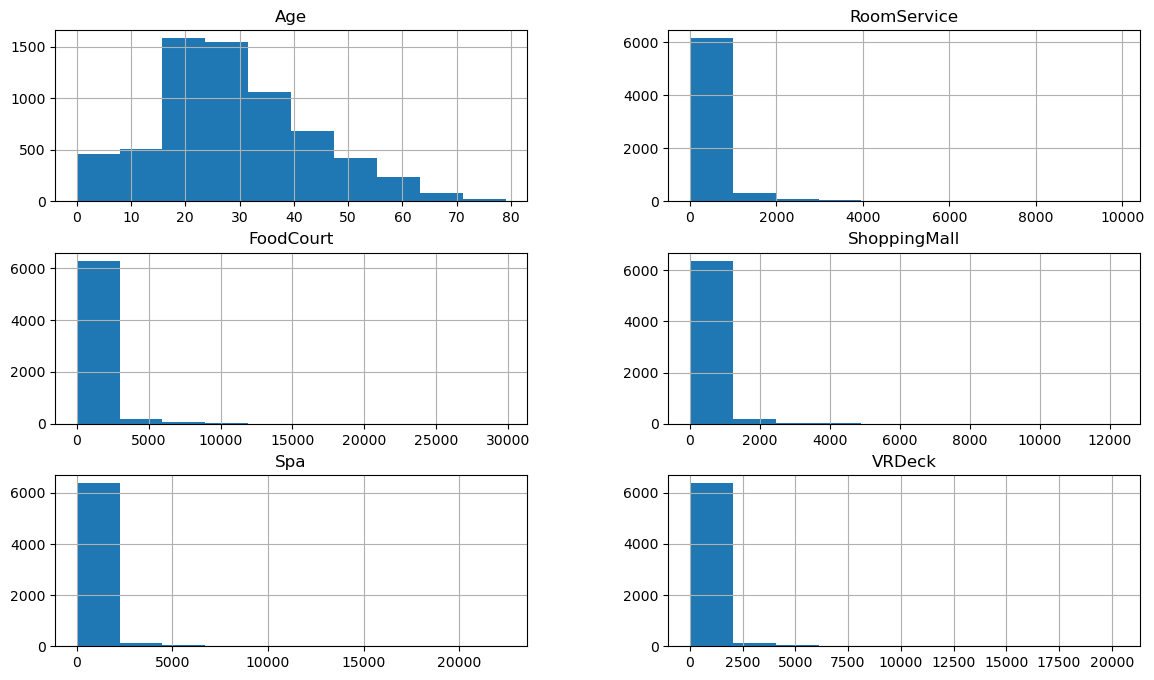

In [19]:
data.hist(figsize=(14,8))

In [20]:
data['RSUsed'] = data['RoomService'] > 0
data['FCUsed'] = data['FoodCourt'] > 0
data['SMUsed'] = data['ShoppingMall'] > 0
data['SpaUsed'] = data['Spa'] > 0
data['VRDUsed'] = data['VRDeck'] > 0

# Recombine the cabin data with some preprocessing
Seperating the cabins into the deck, cabinNumber and side. Then one hot encode the deck and side; while scrapping the cabinNumber.

Also, For Side \
Port = True \
Starbord = False

In [21]:
Cabins = pd.DataFrame(cabins)
Cabins['Side'] = Cabins['Cabin'].str[-1]

Cabins.drop('Cabin', axis = 1, inplace=True)

Cabins['Side'] = Cabins['Side'] == "P"

Cabins.info()
data = data.join(Cabins)

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Side    6606 non-null   bool 
dtypes: bool(1)
memory usage: 58.1 KB


In [22]:
# data.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace = True)

<Axes: >

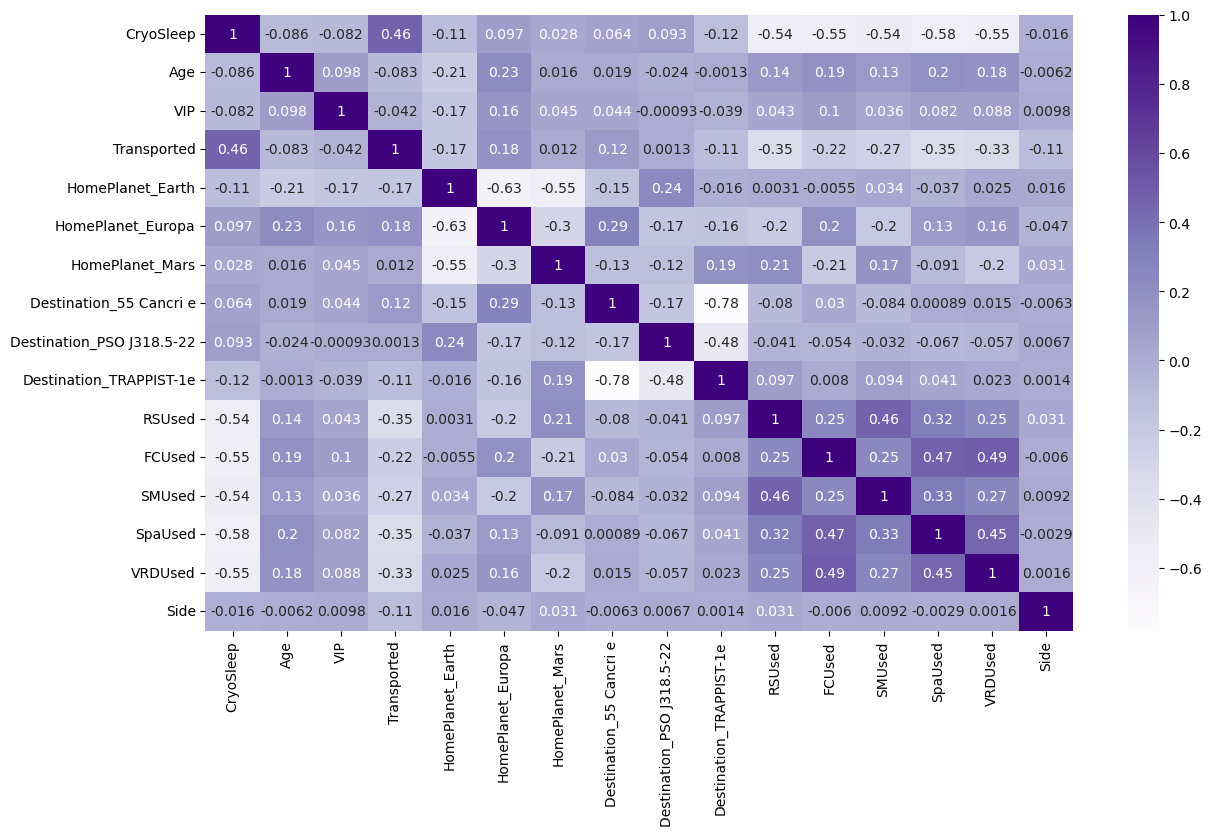

In [23]:

plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap = "Purples")

# Data Modelling

## Logestic Regreession

In [24]:
from sklearn.linear_model import LogisticRegression

X_train = data.drop('Transported', axis = 1)
y_train = data['Transported']

trainSet = pd.read_csv("./test.csv")

X_test = trainSet.drop('Transported', axis = 1)
y_train = trainSet['Transported']

model = LogisticRegression(max_iter = 5000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.7397881996974282
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.77      0.75       653
        True       0.76      0.71      0.73       669

    accuracy                           0.74      1322
   macro avg       0.74      0.74      0.74      1322
weighted avg       0.74      0.74      0.74      1322

Confusion Matrix:
[[503 150]
 [194 475]]


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

paramGrid = [
    {
        "penalty": ["l1", "l2", "elasticnet"],
        "solver": ["saga", "liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag"],
        "warm_start" :  [True, False],
        "l1_ratio" : [0.2, 0.4, 0.6, 0.8]
    }
]

hptm = LogisticRegression( max_iter = 5000)

gsCv = GridSearchCV(hptm,paramGrid,  cv = 3, scoring = "accuracy", return_train_score = True, verbose = 10)

gsCv.fit(X_train, y_train)

In [26]:
finalClf = gsCv.best_estimator_

In [27]:
finalClf

LogisticRegression(l1_ratio=0.4, max_iter=5000, penalty='l1',
                   solver='liblinear', warm_start=True)

In [30]:
fc_pred = finalClf.predict(X_test)
print(classification_report(fc_pred, y_test))

              precision    recall  f1-score   support

       False       0.77      0.72      0.75       698
        True       0.71      0.76      0.74       624

    accuracy                           0.74      1322
   macro avg       0.74      0.74      0.74      1322
weighted avg       0.74      0.74      0.74      1322



In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.7390317700453858
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.77      0.74       653
        True       0.76      0.71      0.73       669

    accuracy                           0.74      1322
   macro avg       0.74      0.74      0.74      1322
weighted avg       0.74      0.74      0.74      1322

Confusion Matrix:
[[502 151]
 [194 475]]
